
## FINANCIAL ECONOMETRICS
MODULE 1 | LESSON 1

---

# **LINEAR REGRESSION ANALYSIS**

|  |  |
|:---|:---|
|**Reading Time** |  60 minutes |
|**Prior Knowledge** | Linear Algebra, Undergraduate-Level Statistics  |
|**Keywords** | Endogenous Variable (Dependent Variable), Exogenous Variable (Independent Variable), Scatter Plot, Outlier, <br> Leverage Point,  Ordinary Least Square Linear Regression (OLS), Parameter (Coefficient), R2, Adjusted R2, <br> Cook's Distance (Cook's D), Influential Point, Influence Plot |


---

*In this course, we will use econometrics to analyze how financial data behaves and interacts. Econometrics uses mathematics and statistical inference to explore the relationship among different financial variables. There are several techniques and models in econometrics. In this lesson, we will start by applying linear regression analysis to demonstrate some basic concepts in econometrics. Linear regression analysis is the most frequently used analytical technique in finance and is the foundation of many more advanced econometrics theories. This lesson will also cover the basic steps of implementing linear regression analysis. These basic steps are applicable to future advanced econometrics analyses. Readers are expected to have prior knowledge of undergraduate statistics.*



In [ ]:
# Libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

plt.rcParams["figure.figsize"] = (12, 9)

## **1. Prepare a Project for Linear Regression Analysis**

Assume you work for an asset management company as an equity analyst. Your manager asks you to find out what caused the recent increase in Coca Cola's stock (NYSE: KO) price and if there is still potential for the price to keep growing. In this situation, what would you do? Here are three steps to think about:

### **1.1 Identify Potential Factors Influencing KO's Stock Price**

You can do some research to identify potential factors that impact the stock price. It could be the company's sales. It could be that the whole stock market is going up. There might be other factors that explain *KO*'s stock price increase based on your research and understanding of the company. Once you identify the factors, you can start to collect data for analysis.

### **1.2. Quantify the Relationship between KO's Stock Price and Selected Factors**

Once the factors are determined and the data is collected, we need a system in place to tell us how each factor influences the stock price. For example, we would like to know not only if the fluctuation in sales will increase/decrease the stock price but also how much the stock price will move when the sales numbers move. We need to build a model to provide this information. In this lesson, we will use linear regression analysis to build this model. Then, we will assess how accurate the model is and adjust the model until we get a satisfactory one.

### **1.3 Forecast the future stock price**

After we get the regression model, we can create several scenarios to predict the stock price move. For example, if *KO*'s revenue is one of the factors in the model, we can simulate how much the stock price would change given a 0.5% increase, 1% increase, and 2% increase in revenue. This exercise will help us predict *KO*'s stock price increase potential.

## **2. Endogenous Variable vs. Exogenous Variable**

Assume you have identified that the following three factors are most impactful on *KO*'s stock price: *KO*'s revenue, Pepsi's stock price, and the Dow Jones Industrial Average Index. We will use these three factors to create a linear regression model to predict *KO*'s next-day closing stock price. Finance theory tells us a stock excess return is a better variable to analyze than the actual price. The excess return is the actual return minus risk-free interest rate (usually Treasury Bill Rates). Therefore, we will convert all our variables into returns or ratios. In our modeling dataset, we will have the following variables:

> *KO*'s stock excess return (%) <br>
> *KO*'s sales growth (%) <br>
> *DOW 30* Index excess return (%) <br>
> *Pepsi*'s stock excess return (%)

In order to use comparable variables to conduct modeling work, all variables are quarterly ratios (quarterly excess returns and quarterly sales growth).

Once we have our dataset ready, we need to decide which variables are endogenous variables and which are exogenous variables. An **endogenous variable**, also called a **dependent variable**, is a variable whose value is determined by the model. An **exogenous variable**, also called an **independent variable**, is a variable whose value is determined outside of the model or is given to us. In our case, we want to build a regression model to understand and predict how *KO*'s stock excess return will move when the three factors change. *KO*'s stock excess return is an endogenous variable. The other three variables are exogenous variables because their value is not decided by the model. 

**Figure 1: Relationship between Exogenous Variables and Endogenous Variable**

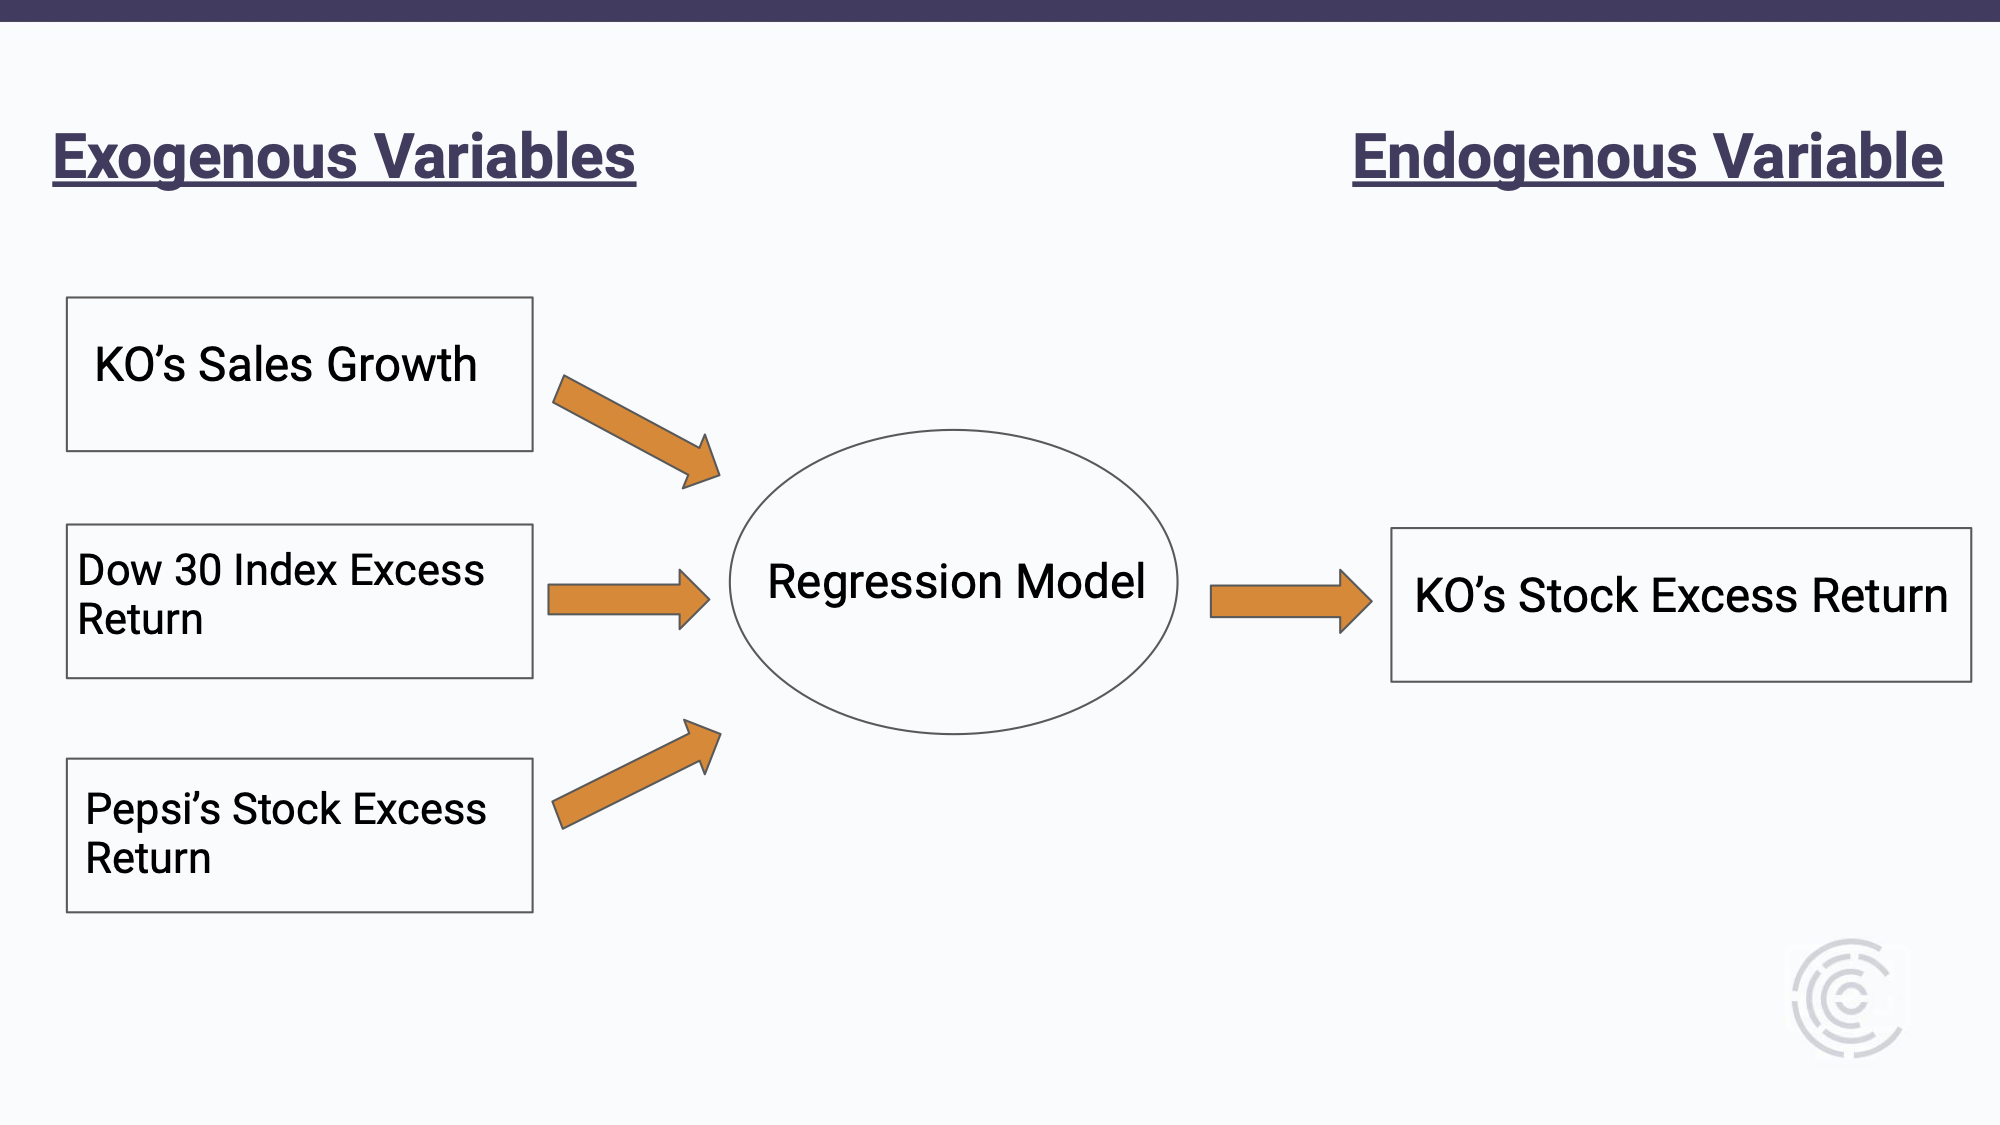

## **3. Check Relationship between Endogenous Variable and Exogenous Variables**

After defining endogenous variables and exogenous variables for our regression model, we will use some graphical tools to investigate the relationships of our selected variables. This step is important because these graphs can give us information as to how to structure our regression model and decide if some selected variables and data points should be excluded. The graphic tool we will use is a **scatter plot**. A scatter plot is a two-dimensional graph with one variable on one axis and another variable on another axis. A scatter plot can show us the relationship of two variables. So what exactly is a scatter plot used for?

First, a scatter plot can check for the linear relationship between the endogenous variable and the exogenous variables. One of the assumptions in running regression analyses is that the endogenous variable has a linear relationship with exogenous variables. By looking at the scatter plot, we can determine if we can draw a straight line where most of the points will be around the line.

Second, a scatter plot can be used to check for independence between the endogenous variable and exogenous variables. Continuing from the previous paragraph, if the straight line drawn is either a horizontal line or a vertical line, it means no matter how much the value of one variable moves, the value of the other variable always stays within a tight range. In this case, the two variables are independent of each other. If an exogenous variable is independent of the endogenous variable, we should drop this exogenous variable from the model.

Lastly, a scatter plot can be used to find extreme points that are well-separated from the other points. There are two types of extreme points. One is called an outlier. An **outlier** is a point that doesn't follow the general trend of the other points. The other one is called a leverage point. A **leverage point** has extreme value for exogenous variables. Both types may or may not impact the estimated result of the regression model. Try to run one model with them and another model without them. Then, compare the two model results to see if these extreme points are crucial to the final model result.

**Figure 2: Scatter Plot**—**KO Stock Excess Return vs. Dow 30 Index Excess Return**

In [ ]:
# Download the dataset
data_set = pd.read_csv("../fin_data_set.csv")

In [ ]:
# Create scatter plot
scatt = data_set.plot.scatter(
    x="Coke_Q_EX_R",
    y="Dow_Q_EX_R",
    title="Scatterplot Coke Stock Excess Return vs DOW 30 Index Excess Return",
)
scatt.set(xlabel="Coke Stock Excess Return", ylabel="DOW 30 Index Excess Return")
plt.show()

The scatter plot in Figure 2 shows that the *KO* stock excess return and *Dow 30* Index excess return tend to move in the same direction within our dataset. A straight line can be drawn from the lower left to the upper right. There are two extreme points in the plot, but they are positioned along the straight line. 

We can also use the **Pearson Correlation** metric to check the linear relationship of two variables. The value of the Pearson Correlation is between $-1$ and $1$. If the value of two variables tends to move in the same direction, the correlation is positive. If the two variables tend to move in opposite directions, the number is negative. A correlation of $1$ means the two variables have a perfectly positive linear relationship. 

**Figure 3: Histogram, Correlation, and Scatter Plot Graph Matrix For Independent Variables and Dependent Variable**


In [ ]:
# Function to calculate correlation coefficient between two arrays


def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r"$\rho$ = " + str(round(coef, 2))

    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy=(0.3, 0.15), size=20, xycoords=ax.transAxes)

In [ ]:
# Create the default pairplot
grid = sns.pairplot(
    data_set, vars=["Coke_Q_EX_R", "Dow_Q_EX_R", "Pepsi_Q_EX_R", "REV_Q_R"], height=3
)

# Map a scatter plot and Pearson correlation coefficient to the upper triangle
grid = grid.map_upper(plt.scatter)
grid = grid.map_upper(corr)

# Map a histogram to the diagonal
# grid = grid.map_diag(plt.hist)

# Map a density plot to the lower triangle
grid = grid.map_lower(sns.kdeplot)

> Data Period: 2016Q2 – 2021Q3 <br>
> Data Source: Yahoo Finance and Coca Cola's website <br>
> *KO_Q_EX_R*: *KO* Quarterly Stock Excess Return <br>
> *Dow_Q_EX_R*: *DOW 30* Index Quarterly Excess Return <br>
> *Pepsi_Q_EX_R*: Pepsi Quarterly Stock Excess Return <br>
> *REV_Q_R*: *KO* Quarterly Revenue change % 




Figure 3 provides a summary of the relationships of variables in *KO*'s stock excess return analysis. The matrix is split into three parts. 

* The lower left triangle of the matrix shows the scatter plots for all two-way combinations of the four variables.
* The graphs of the diagonal of the matrix are the histograms of the four variables.
* The upper right triangle of the matrix provides the correlation values of all two-way combinations of the four variables.

The scatter plot from the *KO* return and *Dow* return shows the two variables have a good positive linear relationship, as is the case for the *KO* return and Pepsi return. In both scatter plots, the data points also form an oval shape, more or less. The red line is also tilted upward. These signs suggest these two variables are good choices for modeling *KO*'s return. In the scatter plot for *KO*'s return and *KO*'s revenue growth, we don't see as clear an oval shape, and the red line is not as straight and sloped upward as the other two graphs. Their correlation values on the upper right also confirm the information from the graphs. Dow return and Pepsi return have good positive correlation values with *KO*'s return. However, *KO*'s revenue growth and return have a smaller correlation.

## **4. Estimate the Regression Model**

Now, let's start to build the regression model. The method we are going to use here is ordinary least square (OLS) linear regression. There are two types of OLS linear regression models: **simple OLS** and **multiple OLS**. If there is only one exogenous variable vs. one endogenous variable, then it is called simple OLS linear regression. If there is more than one exogenous variable vs. one endogenous variable, then it is called multiple OLS linear regression. Since we have three exogenous variables for our model, we will build a multiple OLS linear regression.

Here is the linear regression model we are going to estimate:

$$ \text{KO excess return} = b_0 + b_1 \text{Dow excess return} + b_2 \text{Pepsi excess return} + b_3 \text{KO revenue growth} $$

$b_0$, $b_1$, $b_2$ and $b_3$ are called **parameters** or **coefficients**. We will use the OLS method to estimate the values of parameters in the model. Once the values of the parameters are obtained from the OLS calculation, we call these values **estimates**.

**Figure 4: Linear Regression Result for KO Excess Return Model**


In [ ]:
# Linear regression result
result = smf.ols(
    "Coke_Q_EX_R ~ Dow_Q_EX_R + Pepsi_Q_EX_R + REV_Q_R", data=data_set
).fit()
result.summary()

In [ ]:
# Parameters with 6 significant digits
result.summary2().tables[1]

Figure 4 shows the result of the regression. Let's look at the estimates of the three variables. What does the estimate mean? The estimate for Dow excess return is 0.619723. It means when Dow excess return increases by 0.01 (1%), *KO* excess return will increase by 0.00619723 (0.619723%).

## **5. Review the Model**

Our next question will focus on how good our estimated model is. There are several ways to assess and test the fitness of the model. We will first look at the performance of each exogenous variable in the model and then assess the overall model fit.

### **5.1 Performance of Each Exogenous Variable**

Under the section of coefficient in the result table, there is a column called *Pr(>|t|)*. This column shows $p$-values for each coefficient. A $p$-value is a metric to indicate whether the exogenous variable can explain the change of the endogenous variable. The lower the number of the $p$-value, the better the explanatory ability this exogenous variable has regarding the endogenous variable. In many research projects, $0.05$ is the level that determines whether an exogenous variable is significant. From our result, the only exogenous variable that is significant is *Dow* excess return ($p$-value: 0.00526 < 0.05). Does that mean we can just drop the other two variables from the model? There are at least two points we can consider before we make that decision.

1. **Does KO's excess return and KO's revenue growth exhibit a linear relationship?**

From the scatter plot for both variables, we know they have a weak linear relationship. Can we transform *KO*'s revenue growth into a different data series and then check the relationship again? We can try to take the square root or the logarithm of *KO*'s revenue growth and draw the scatter plot again.

2. **Are exogenous variables also correlated to each other?**

The correlation between Dow excess returns and Pepsi excess returns is 0.56 based on the scatter plot matrix. The two variables are medium positively correlated. When there are two or more correlated exogenous variables in a regression model, oftentimes, the exogenous variable with a higher correlation to the endogenous variable will absorb all the explanatory ability from other correlated exogenous variables, making other correlated exogenous variables not significant in the model.

The above two points help us rethink our choice of exogenous variables in the model and the way to handle them. We will discuss these two points in more detail and offer possible solutions in the following lessons.

### **5.2 $R^2$ and Adjusted $R^2$**

Now, let's look at the general model fit. $R^2$ , the coefficient of determination, is a commonly used metric to assess the model fit. $R^2$ tells us how much of the variation in the endogenous variable can be explained by the variation of all exogenous variables in the model. The value of $R^2$ is between $0$ and $1$. If $R^2$ is $1$, it means the model perfectly explains the *KO* excess return behavior. In other words, given a set of numbers from all exogenous variables, the model can 100% correctly produce the number for the endogenous variable. In general, the higher the value of $R^2$, the better the model fit.

In our model, the $R^2$ is 0.604. It means that the change in Dow excess return, Pepsi excess return, and *KO* revenue growth together can explain 60% of the change in *KO* excess return. 

If your manager thinks 0.604 is not satisfactory, you may be asked to improve the model. Usually, adding a new exogenous variable is an easy starting point. Adding more exogenous variables to a model usually improves the model's $R^2$. However, it can cause the issue of a model overfitting. What is model overfitting? It means the model can do an excellent job predicting the endogenous variable from the data sample that is used to build the model. However, when you put a different dataset with the endogenous variable and exogenous variables into the model, the model will give a poor forecast of the endogenous variable with the new values for the exogenous variables. 

An **adjusted $R^2$** can address this issue. What does an adjusted $R^2$ intend to adjust? Although adding new independent variables to a regression model will never lower $R^2$, it will add complexity to the model. It can also cause the model overfitting issue as described above. Hence, we have to ask if the extra complexity added to the model is worth it. This is what an adjusted $R^2$ does. Like $R^2$, an adjusted $R^2$ is between 0 and 1. An adjusted $R^2$ is always lower than $R^2$. An adjusted $R^2$ will increase if the degree of improvement from adding one exogenous variable is greater than the penalty imposed by one additional exogenous variable to the model. 

In our model, the adjusted $R^2$ is 0.538. It is hard to tell if this is a good adjusted $R^2$. In practice, a researcher usually builds several versions of the regression models and then compares their adjusted $R^2$ to pick a final model. Model building and tweaking is an iterative process; it is rarely the case that the first model is the best model for any project. 

## **6. Outliers and Influence**

In the previous section, we reviewed the performance of the exogenous variables in the model and of the model as a whole. In this section, we will look into the impact of each data point from the data sample used to build the regression model.

In the scatter plot section, we discussed extreme values in the dataset. We introduced outliers and leverage points. Not all of them will influence the result of the regression model. The following visual examples demonstrate how an extreme data point can impact the regression result. The red dot is the extreme point. The black line is the regression line without the extreme point. The red line is the regression line with the extreme point.

**Figure 5: The Impact of an Outlier on the Regression Model Result**


In [ ]:
# Generate 30 random points
np.random.seed(42)
n = 30
x = np.random.uniform(0, 5, n)
y = 1 + 3 * x + np.random.normal(0, 1, n)

# Add outlier at (2.5, 17)
x_with_out = np.append(x, 2.5)
y_with_out = np.append(y, 17)

In [ ]:
# Plot best line of fit for 30 original points only (in black) and for 30+outlier (in red)
plt.title("Outlier", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(2.5, 17, "ro")  # Outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ao, bo) = np.polyfit(x_with_out, y_with_out, 1)
plt.plot(
    x_with_out,
    ao * x_with_out + bo,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

**Figure 6: The Impact of a Non-Influential Leverage Point on the Regression Model Result**


In [ ]:
# Add non-influential leverage point at (8, 25)
x_with_lev = np.append(x, 8)
y_with_lev = np.append(y, 25)

In [ ]:
# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (non influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 25, "ro")  # non-influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(al, bl) = np.polyfit(x_with_lev, y_with_lev, 1)
plt.plot(
    x_with_lev,
    al * x_with_lev + bl,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

**Figure 7: The Impact of an Influential Leverage Point on the Regression Model Result**


In [ ]:
# Add non-influential leverage point at (8, 25)
x_with_inf = np.append(x, 8)
y_with_inf = np.append(y, 5)

In [ ]:
# Plot best line of fit for 30 original points only (in black) and for 30+lev (in red)
plt.title("Leverage (influential)", {"size": 14})
plt.plot(x, y, "o")  # scatterplot
plt.plot(8, 5, "ro")  # influential outlier in red

# line of fit for 30 original points only
(a, b) = np.polyfit(x, y, 1)
plt.plot(x, a * x + b, "b-", label="Best line of fit for 30 original points")

# line of fit for 30+outlier
(ai, bi) = np.polyfit(x_with_inf, y_with_inf, 1)
plt.plot(
    x_with_inf,
    ai * x_with_inf + bi,
    "r-",
    label="Best line of fit for data including outlier",
)

plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc="lower right")
plt.show()

In Figures 5 and 6, we can see the regression lines don't change much with or without the extreme point. However, in Figure 7, the extreme point does significantly alter the regression result. An extreme point that can significantly alter the regression result is called an **influential point**. We need to identify influential points in the dataset and study why they are extreme (a special event or erroneous data input) because they can potentially alter the regression result. Then, we will run one model with the influential point and one without the influential point. Afterwards, we compare the model results and evaluate which results fit our modeling goal the best.

We use **Cook's distance (Cook's D)** to identify influential points in the dataset. *Cook's D* is a metric to calculate the prediction difference from the model with a data point and without a data point. The higher the *Cook's D*, the greater the influence the data point has on estimating the regression model. Oftentimes, a data point with a *Cook's D* larger than 1 is considered an influential point. 

**Figure 8: Influence Plot for KO's Excess Return Dataset**


In [ ]:
# Influence plot
fig = sm.graphics.influence_plot(result, criterion="cooks", alpha=0.5)
fig.tight_layout(pad=1.0)

In [ ]:
# Finding most influential points
influence = result.get_influence()
inf_sum = influence.summary_frame().sort_values("cooks_d", ascending=False)
inf_sum.head(30)

Figure 8 is an **influence plot.** It helps us visualize the *Cook's D* among all data points. On the horizontal axis of the plot is hat value. Hat value measures the difference between the exogenous values of a data point and the mean of exogenous values in the dataset. On the vertical axis of the plot is studentized residuals. These are the standardized residuals from the predicted endogenous value of the data point from the model. The bubbles in the plot indicate the size of the *Cook's D* for each point. The bigger the bubble, the higher the *Cook's D* for a data point. 

From the influence plot, we can see that Point 15 and Point 18 have the highest *Cook's D* values. Among the points, Point 15 has a *Cook's D* of 1.21, so we consider it an influential point.

## **7. Conclusion**

In this lesson, we have introduced several important concepts for regression analysis. We started with the idea of an endogenous variable and an exogenous variable. An endogenous variable in a regression model is a variable whose value is determined by the model. An exogenous variable is a variable whose value is given outside of the model. Then, we discussed how a scatter plot can help us check if two variables are linearly correlated, if they are independent, or if they have extreme data points. We used the OLS method to estimate a regression model for our *KO* excess stock price return project. We learned how to use the p-value to check the significance of the coefficient estimate for each exogenous variable. We learned how to use $R^2$ and an adjusted $R^2$ to assess the overall performance of regression model results. We introduced the concept of outliers, leverage points, and influence points. We also learned how to use Cook's distance and influence plots to identify an influence point.

During this lesson, we also touched upon issues such as variable transformation and correlated exogenous variables in a model. In the upcoming lessons, we will address these issues in more depth.

<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
